<a href="https://colab.research.google.com/github/K-Saritha/ML-LAB/blob/main/week_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/Salary_dataset_simple_linear_reg - Salary_dataset_simple_linear_reg.csv")

In [ ]:
data.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [ ]:
y=data['Salary']
x1=data['YearsExperience']

<function matplotlib.pyplot.show(close=None, block=None)>

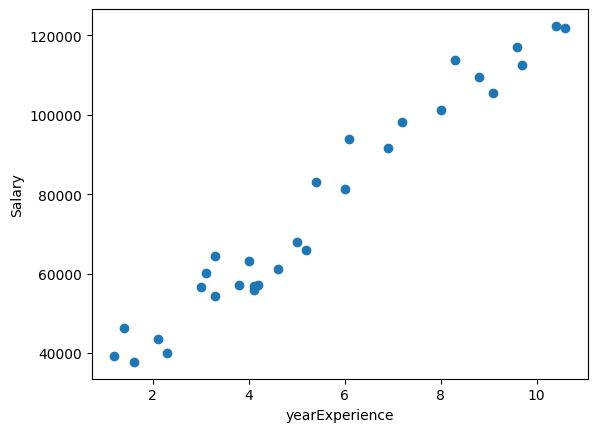

In [ ]:
plt.scatter(x1,y)
plt.xlabel("yearExperience")
plt.ylabel("Salary")
plt.show

In [ ]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.14e-20
Time:                        08:34:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

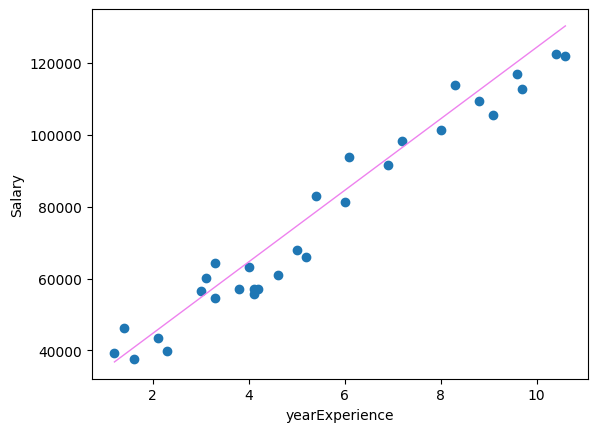

In [ ]:
plt.scatter(x1,y)
yhat=9949.9623*x1+2.485e+04
fig=plt.plot(x1,yhat,lw=1,c='violet',label='regression line')
plt.xlabel("yearExperience")
plt.ylabel("Salary")
plt.show

LEAST SQUARES REGRESSION

In [ ]:
N=len(x1)
x_sum=np.sum(x1)
y_sum=np.sum(y)
xy_sum=np.sum(x1*y)
x_square_sum=np.sum(x1*x1)
beta_1=((N*xy_sum)-(x_sum*y_sum))/(N*x_square_sum-(x_sum**2))
beta_0=(y_sum-(beta_1*x_sum))/N
print(beta_0,beta_1)


24848.20396652318 9449.96232145508


<function matplotlib.pyplot.show(close=None, block=None)>

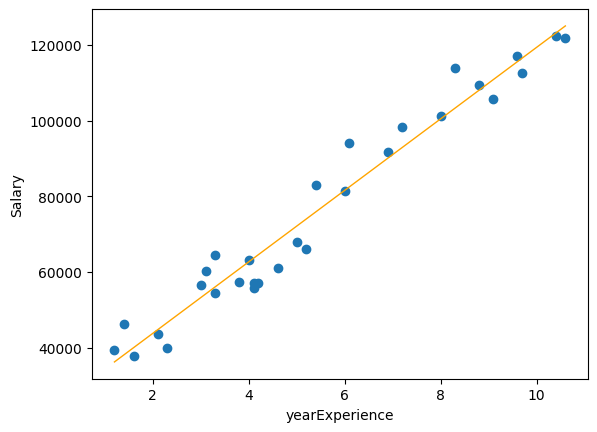

In [ ]:
plt.scatter(x1,y)
ycap=beta_0+beta_1*x1
fig=plt.plot(x1,ycap,lw=1,c='orange',label='regression line')
plt.xlabel("yearExperience")
plt.ylabel("Salary")
plt.show

In [ ]:
sse=np.sum((y-ycap)**2)
sst=np.sum((y-y_sum)**2)
ssr=np.sum((ycap-y_sum)**2)
r2=(ssr/sst)
print(r2)
print(sse,ssr,sst)

0.9999935641299886
938128551.6684291 145764677092980.3 145765615221532


GRADIENT DESCENT ALGORITHM

beta0 = 3137.494079088115
beta1 = 12595.591018355248


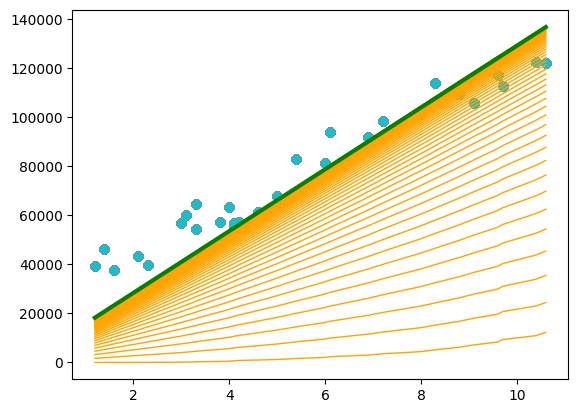

In [ ]:

def estimate_coef(x1,y):
  beta0=0;
  beta1=0;
  alpha=0.00009; #learning rate.
  n=np.size(x1)
  y_expected=np.zeros(n)

  for j in range (100):
    for i in range(n):
        y_expected[i]=beta0+beta1*x1[i]
        beta0=beta0+alpha*(y[i]-y_expected[i])
        beta1=beta1+alpha*(y[i]-y_expected[i])*x1[i]
    plt.scatter(x1,y)
    fig=plt.plot(x1,y_expected,lw=1,c='orange',label='regression line')
    error=y-y_expected
    squared_error=np.sum(error**2)*(1/n)
    if squared_error <=1:
      print("squared_error= ",squared_error)
      print("iteration =",n)
  return beta0,beta1

b0,b1=estimate_coef(x1,y)
print("beta0 =",b0)
print("beta1 =",b1)

y_pred=b0+(b1*x1)
plt.plot(x1,y_pred,color='green',lw=3)

beta0 = 2990.849280872791
beta1 = 12749.204836252127
0.8332480700398496


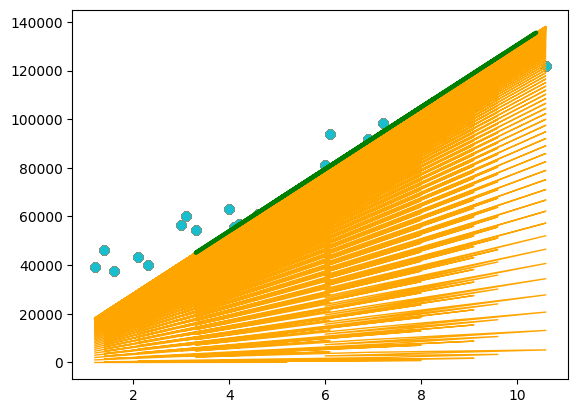

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=42)
x_train=train['YearsExperience'].values
y_train=train['Salary'].values
x_test=test['YearsExperience'].values
y_test=test['Salary'].values

def estimate_coef(x1,y):
  beta0=0;
  beta1=0;
  alpha=0.00009; #learning rate.
  n=np.size(x1)
  y_expected=np.zeros(n)

  for j in range (100):
    for i in range(n):
        y_expected[i]=beta0+beta1*x1[i]
        beta0=beta0+alpha*(y[i]-y_expected[i])
        beta1=beta1+alpha*(y[i]-y_expected[i])*x1[i]
    plt.scatter(x1,y)
    fig=plt.plot(x1,y_expected,lw=1,c='orange',label='regression line')
    error=y-y_expected
    squared_error=np.sum(error**2)*(1/n)
    if squared_error <=1:
      print("squared_error= ",squared_error)
      print("iteration =",n)
  return beta0,beta1


b0,b1=estimate_coef(x_train,y_train)
print("beta0 =",b0)
print("beta1 =",b1)

y_pred=b0+(b1*x_test)
plt.plot(x_test,y_pred,color='green',lw=3)
mean_squared_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)
print(r2_score(y_test,y_pred))



